# Utilizando Lógica Fuzzy para identificar perfis no NPS
Neste notebook vamos implementar um Fuzzy Control System para saber se um determinado cliente pode ser um promotor, neutro ou detrator.

## O que é o NPS?
O Net Promoter Score, ou NPS, é uma metodologia criada por Fred Reichheld nos EUA, com o objetivo de realizar a mensuração do Grau de Lealdade dos Consumidores de qualquer tipo de empresa.

In [1]:
# !pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
%matplotlib inline

### Estabelecendo os objetos Antecedent/Consequent
Escolhemos como pergunta de pesquisa: 
- "Como foi sua experiência com a nossa empresa? (de 0 a 10)"
- "Quanto você recomendaria nosso produto para um amigo? (de 0 a 10)"

In [3]:
# nossas entradas, as respostas das perguntas do cliente. 
satisfacao   = ctrl.Antecedent(np.arange(0, 11, 1), 'satisfacao')
recomendacao = ctrl.Antecedent(np.arange(0, 11, 1), 'recomendacao') 

In [4]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
satisfacao.automf(3)
recomendacao.automf(3)

In [5]:
# nossa saída: aquele que devemos identificar o perfil
cliente = ctrl.Consequent(np.arange(0, 11, 1), 'cliente')

In [6]:
cliente['detrator'] = fuzz.trimf(cliente.universe, [0, 0, 5])
cliente['neutro']      = fuzz.trimf(cliente.universe, [0, 5, 10])
cliente['promotor']    = fuzz.trimf(cliente.universe, [5, 10, 10])

/home/rafael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


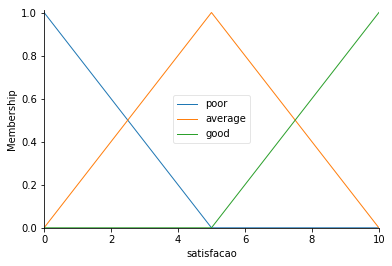

In [7]:
# Visualizando
satisfacao.view() #pensar em mudar nome de categorias dps

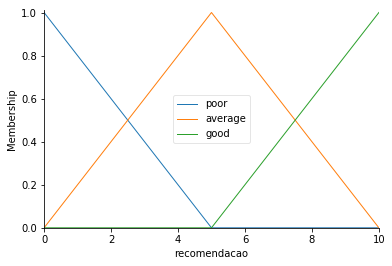

In [8]:
recomendacao.view()

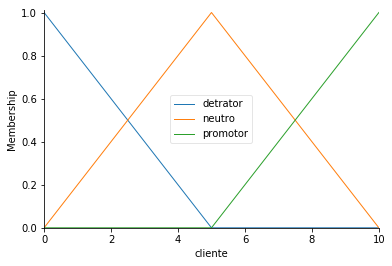

In [9]:
cliente.view() # categorização de clientes sao muito separatistas

In [10]:
# Definindo as regras
rule2 = ctrl.Rule(recomendacao['poor'] | satisfacao['poor'], cliente['detrator'])
rule1 = ctrl.Rule(recomendacao['good'] & satisfacao['good'], cliente['promotor'])
rule3 = ctrl.Rule(recomendacao['average'] | satisfacao['average'], cliente['neutro'])

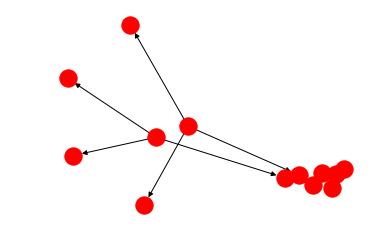

In [11]:
rule1.view()
plt.show()

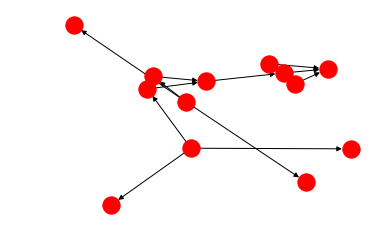

In [12]:
rule2.view()
plt.show()

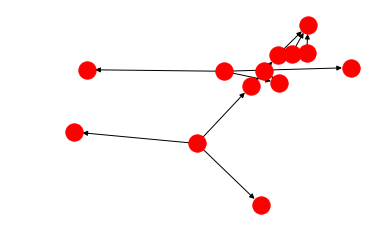

In [13]:
rule3.view()
plt.show()

In [14]:
# Criando sistema de controle
cliente_tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cliente_tipping = ctrl.ControlSystemSimulation(cliente_tipping_ctrl)

In [15]:
# Supondo que satisfação = 8 e recomendacao = 10
cliente_tipping.input['satisfacao'] = 8.0
cliente_tipping.input['recomendacao'] = 10.0

cliente_tipping.compute()

5.878048780487805


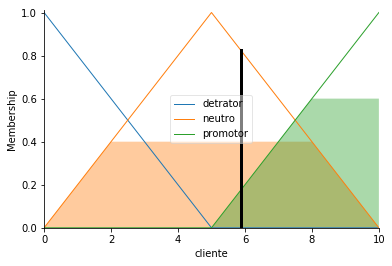

In [16]:
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

5.000000000000001


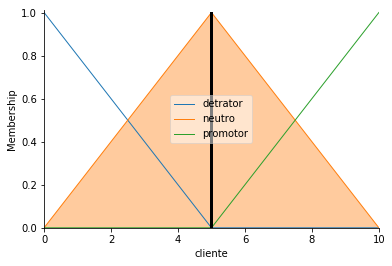

In [17]:
# Supondo que satisfação = 5 e recomendacao = 5
cliente_tipping.input['satisfacao'] = 5.0
cliente_tipping.input['recomendacao'] = 5.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

4.098765432098766


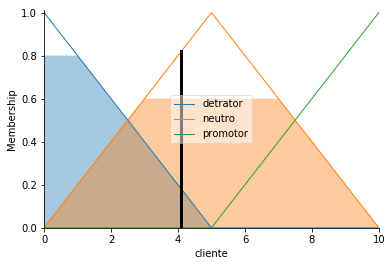

In [18]:
# Supondo que satisfação = 1 e recomendacao = 3
cliente_tipping.input['satisfacao'] = 1.0
cliente_tipping.input['recomendacao'] = 3.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

6.725490196078432


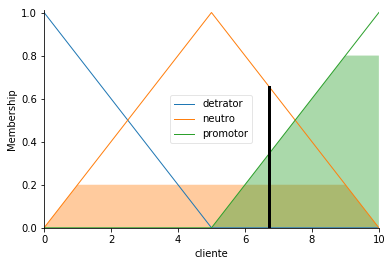

In [19]:
# Supondo que satisfação = 9 e recomendacao = 10
cliente_tipping.input['satisfacao'] = 9.0
cliente_tipping.input['recomendacao'] = 10.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

<h2>Utilizando valor verdadeiro para cliente</h2>

In [20]:
cliente['detrator'] = fuzz.trapmf(cliente.universe, [0, 0, 3, 6])
cliente['neutro']      = fuzz.trapmf(cliente.universe, [6, 7, 7, 8])
cliente['promotor']    = fuzz.trapmf(cliente.universe, [8, 9, 10, 10])

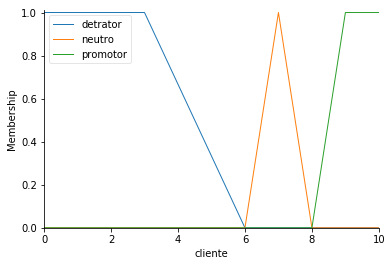

In [21]:
cliente.view() 

In [22]:
# Definir as regras (pensar em mais/melhores regras depois)
rule1 = ctrl.Rule(recomendacao['good'], cliente['promotor'])
rule2 = ctrl.Rule(recomendacao['poor'], cliente['detrator'])
rule3 = ctrl.Rule(recomendacao['average'] | satisfacao['average'], cliente['neutro'])

3.9120000000000004


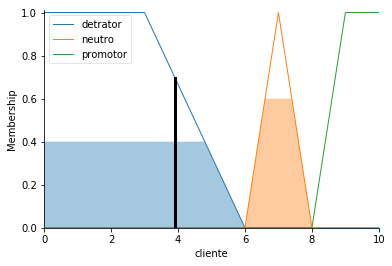

In [23]:
# Criando sistema  de controle
cliente_tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cliente_tipping = ctrl.ControlSystemSimulation(cliente_tipping_ctrl)

# Supondo que satisfação = 8 e recomendacao = 10
cliente_tipping.input['satisfacao'] = 8.0
cliente_tipping.input['recomendacao'] = 3.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)